<a href="https://colab.research.google.com/github/Shir095/BALC_2127839/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Inteligencia Artificial y Redes Neuronales
# PIA:         Entrenamiento de una red neuronal convolucional
# Grupo:008    Hora: N4       Semestre: Agosto-Diciembre 2024
# Equipo 1:    2127839 Bryan Alejandro Lara Carrera
#              2020381 Mario Treviño Rocha
#              1923949 Ovet Orlando García Quiroz
#              1968723 Leonardo Antonio Chavez Mendoza


In [1]:
# Paso 1: importar librerías

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datos, metadatos =tfds.load('cats_vs_dogs',
                   as_supervised=True,
                   with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.7IF2D9_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
# Análisis de datos

metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmp68191zvmtfds'),
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

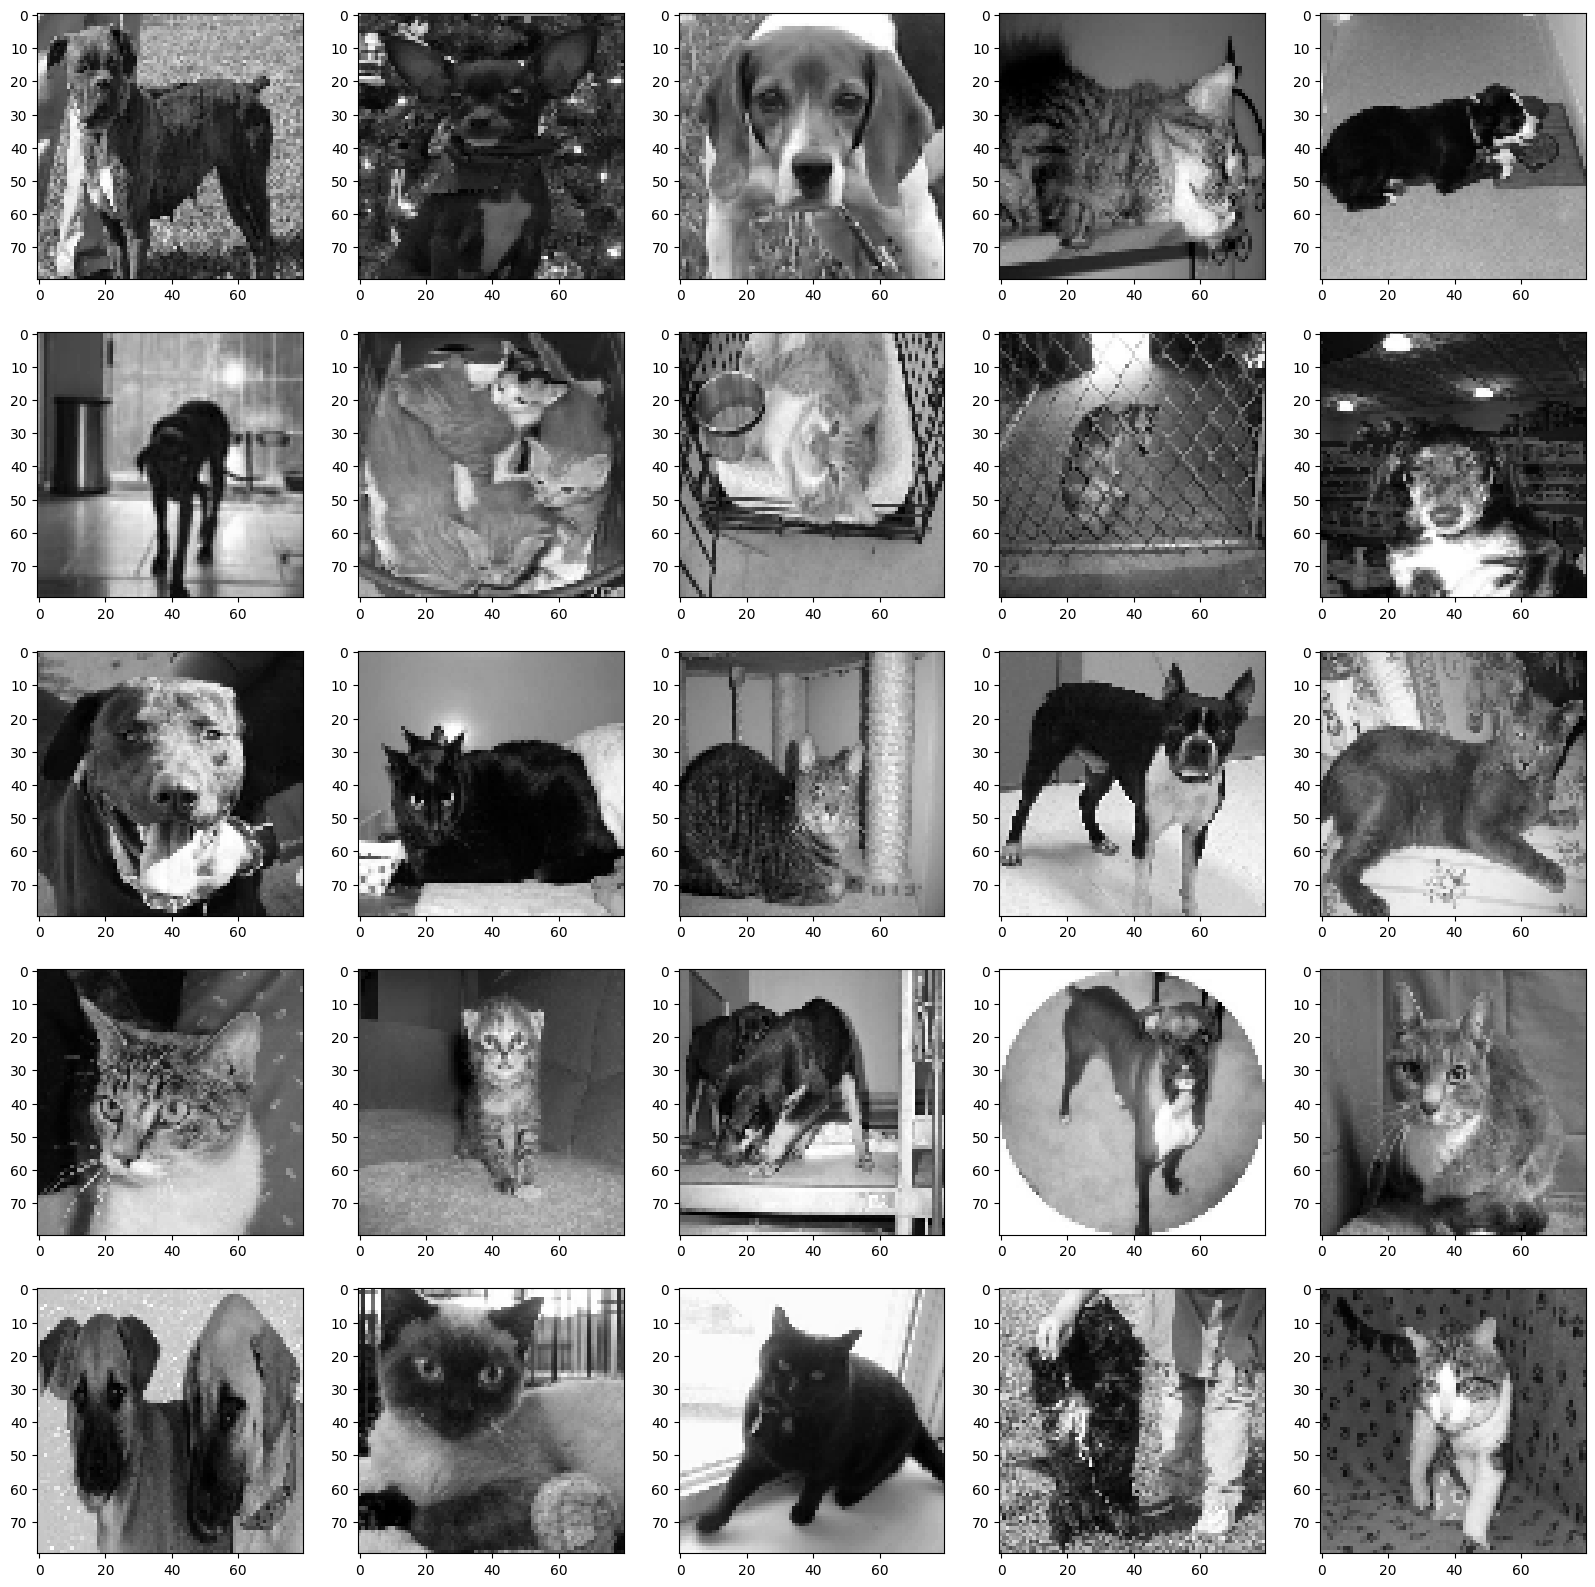

In [4]:
# Paso 3: Preprocesamiento de datos

plt.figure(figsize=(20,20)) # Mostrar 20 imágenes
Tamaño_img=80 #Tamaño de imagen

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (Tamaño_img, Tamaño_img)) #Cambiar tamaño de imagen
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap='gray')

In [5]:
# Creando variable de entrenamiento
Img_entrena = []

In [6]:
for i, (imagen, etiqueta) in enumerate(datos['train']):
  imagen = cv2.resize(imagen.numpy(), (Tamaño_img, Tamaño_img))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(Tamaño_img, Tamaño_img, 1)
  Img_entrena.append([imagen, etiqueta])

In [7]:
Img_entrena

[[array([[[246],
          [140],
          [ 87],
          ...,
          [188],
          [179],
          [159]],
  
         [[202],
          [ 88],
          [ 85],
          ...,
          [167],
          [165],
          [184]],
  
         [[120],
          [ 84],
          [ 83],
          ...,
          [166],
          [142],
          [149]],
  
         ...,
  
         [[181],
          [190],
          [171],
          ...,
          [ 96],
          [ 56],
          [100]],
  
         [[146],
          [165],
          [138],
          ...,
          [104],
          [163],
          [129]],
  
         [[113],
          [108],
          [141],
          ...,
          [ 92],
          [ 49],
          [ 69]]], dtype=uint8),
  <tf.Tensor: shape=(), dtype=int64, numpy=1>],
 [array([[[164],
          [ 75],
          [ 76],
          ...,
          [ 71],
          [ 75],
          [ 73]],
  
         [[ 84],
          [ 65],
          [ 65],
          ...,
          

In [8]:
# Cantidad de imágenes de entrenamiento
len(Img_entrena)

23262

In [9]:
X = [] # Atributos
y = [] # Etiquetas

for imagen, etiqueta in Img_entrena:
  X.append(imagen)
  y.append(etiqueta)

In [10]:
# Normalización

X = np.array(X).astype(float)/255

In [11]:
X

array([[[[0.96470588],
         [0.54901961],
         [0.34117647],
         ...,
         [0.7372549 ],
         [0.70196078],
         [0.62352941]],

        [[0.79215686],
         [0.34509804],
         [0.33333333],
         ...,
         [0.65490196],
         [0.64705882],
         [0.72156863]],

        [[0.47058824],
         [0.32941176],
         [0.3254902 ],
         ...,
         [0.65098039],
         [0.55686275],
         [0.58431373]],

        ...,

        [[0.70980392],
         [0.74509804],
         [0.67058824],
         ...,
         [0.37647059],
         [0.21960784],
         [0.39215686]],

        [[0.57254902],
         [0.64705882],
         [0.54117647],
         ...,
         [0.40784314],
         [0.63921569],
         [0.50588235]],

        [[0.44313725],
         [0.42352941],
         [0.55294118],
         ...,
         [0.36078431],
         [0.19215686],
         [0.27058824]]],


       [[[0.64313725],
         [0.29411765],
         [0.29

In [12]:
y = np.array(y)

In [13]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [14]:
X.shape

(23262, 80, 80, 1)

In [15]:
# Paso 4: Selección y entrenamiento del modelo

In [17]:
# Arquitectura del modelo

modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(80, 80, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
# Visualización de arquitectura del modelo
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 78, 78, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         819,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 912,073 (3.48 MB)

 Trainable params: 912,073 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compilación del modelo
modelo.compile(optimizer='adam',
                loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = modelo.fit(X, y, epochs=10,validation_data=(X, y))

Epoch 1/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 275s 376ms/step - accuracy: 0.5740 - loss: 0.6676 - val_accuracy: 0.7026 - val_loss: 0.5674
Epoch 2/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 272s 374ms/step - accuracy: 0.7499 - loss: 0.5103 - val_accuracy: 0.7936 - val_loss: 0.4420
Epoch 3/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 317s 367ms/step - accuracy: 0.7928 - loss: 0.4398 - val_accuracy: 0.8363 - val_loss: 0.3709
Epoch 4/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 329s 376ms/step - accuracy: 0.8319 - loss: 0.3669 - val_accuracy: 0.8646 - val_loss: 0.3148
Epoch 5/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 353s 419ms/step - accuracy: 0.8582 - loss: 0.3252 - val_accuracy: 0.8764 - val_loss: 0.2858
Epoch 6/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 287s 372ms/step - accuracy: 0.8770 - loss: 0.2821 - val_accuracy: 0.8759 - val_loss: 0.2841
Epoch 7/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 272s 374ms/step - accuracy: 0.8983 - loss: 0.2409 - val_accuracy: 0.9332 - val_loss: 0.1828
Epoch 8/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 317s 368ms/step - accuracy: 0.9232 -

727/727 - 58s - 79ms/step - accuracy: 0.9742 - loss: 0.0765


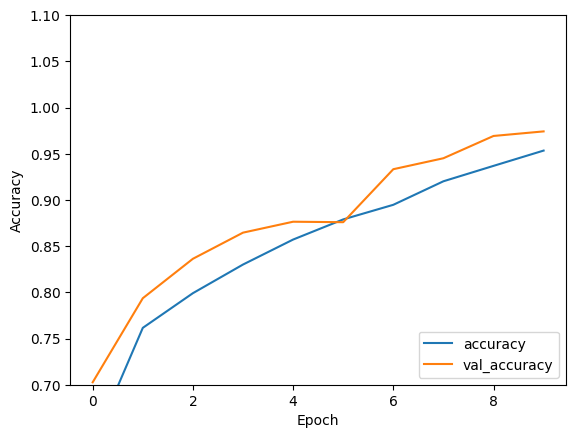

In [21]:
# Evaluación del modelo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = modelo.evaluate(X, y, verbose=2)

In [22]:
# Evaluación de exactitud de la red neuronal
test_loss, test_acc = modelo.evaluate(X, y, verbose=2)
print(f"\nExactitud del modelo en datos de prueba: {test_acc}")

727/727 - 61s - 84ms/step - accuracy: 0.9742 - loss: 0.0765

Exactitud del modelo en datos de prueba: 0.9741638898849487


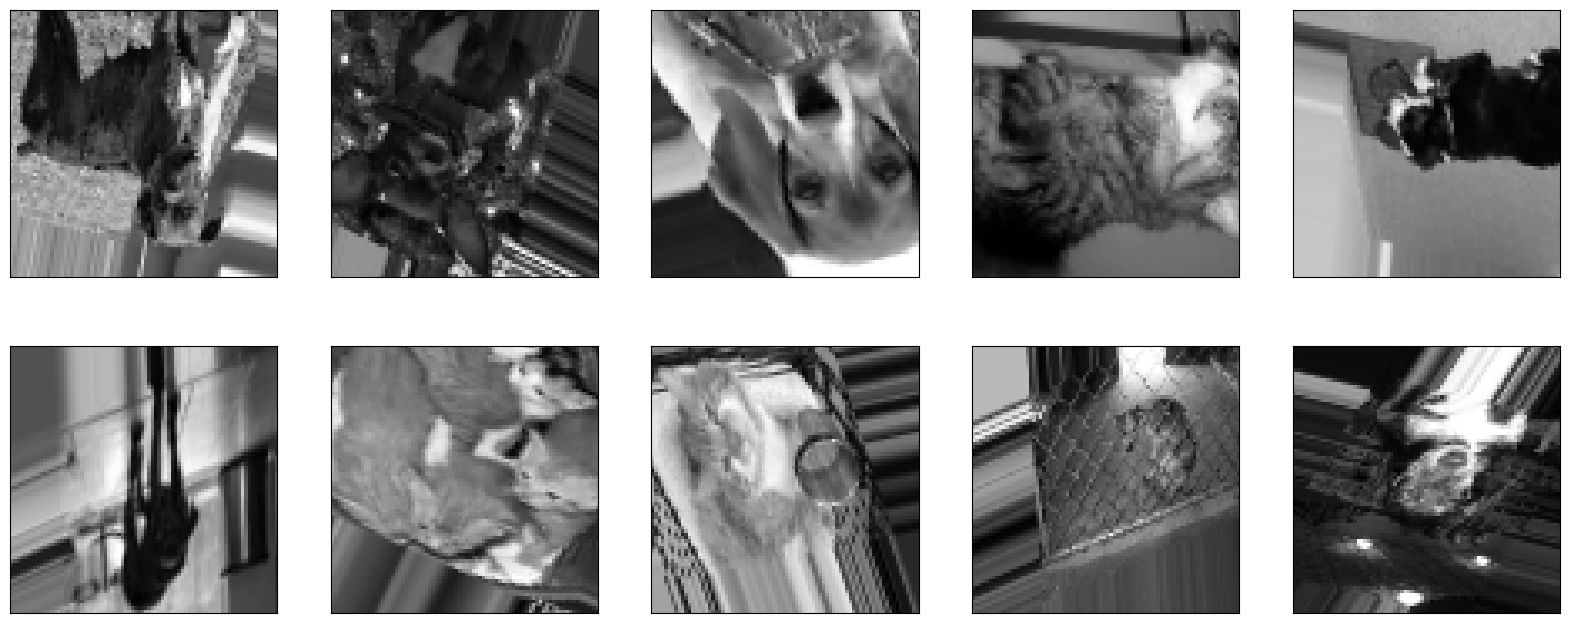

In [23]:
# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=20,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
    )
datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(80, 80), cmap="gray")
  break

In [24]:
print(len(X)*.2)
print(len(X)*.8)

4652.400000000001
18609.600000000002


In [25]:
X_entrena = X[:18609]
X_prueba = X[4652:]

y_entrena = y[:18609]
y_prueba = y[4652:]

In [26]:
# Paso 5: Prueba de la red neuronal
X_prueba = X_prueba.reshape(-1, 80, 80, 1)

In [27]:
predictions = modelo.predict(X_prueba)

582/582 ━━━━━━━━━━━━━━━━━━━━ 54s 92ms/step


In [28]:
# Función para visualizar imágenes de prueba
def plot_image(i, predictions_array, y_prueba, img):
  predictions_array, true_label, img = predictions_array, y_prueba[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [29]:
class_names = ['Gato', 'Perro']

In [30]:
# Resultado de la última imagen
predictions[-1]

array([3.2392934e-05], dtype=float32)

In [31]:
# Resultado de la última imagen
y_prueba[-1]

0

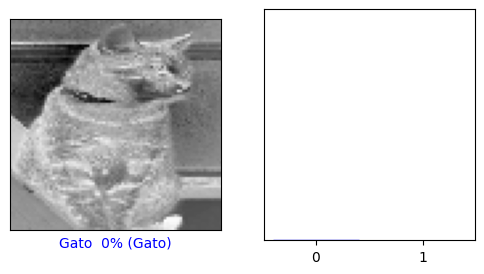

In [32]:
# Resultado de la última imagen
i = -1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_prueba, X_prueba)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_prueba)
plt.show()

In [33]:
# Resultado de la imagen 500
predictions[500]

array([2.7109065e-05], dtype=float32)

In [34]:
# Resultado de la imagen 500
y_prueba[500]

0

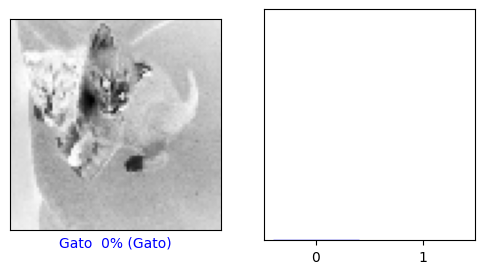

In [35]:
# Resultado de la imagen 500
i = 500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_prueba, X_prueba)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_prueba)
plt.show()

In [36]:
# Resultado de la imagen 1400
predictions[1400]

array([0.9889458], dtype=float32)

In [37]:
# Resultado de la imagen 1400
y_prueba[1400]

1

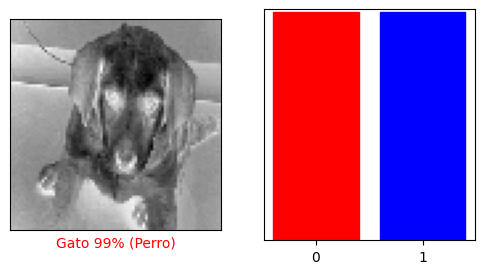

In [38]:
# Resultado de la imagen 1400
i = 1400
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_prueba, X_prueba)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_prueba)
plt.show()

In [39]:
# Resultado de la primera imagen
predictions[1]

array([3.0785285e-09], dtype=float32)

In [40]:
# Resultado de la primera imagen
y_prueba[1]

0

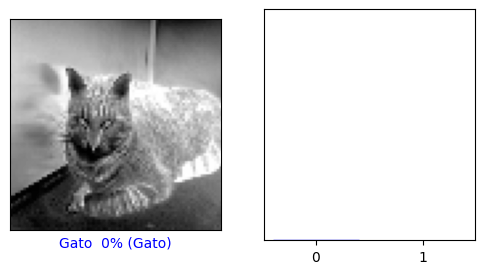

In [41]:
# Resultado de la primera imagen
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_prueba, X_prueba)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_prueba)
plt.show()

In [42]:
# Resultado de la imagen 5508
predictions[5508]

array([0.9999972], dtype=float32)

In [43]:
# Resultado de la imagen 5508
y_prueba[5508]

1

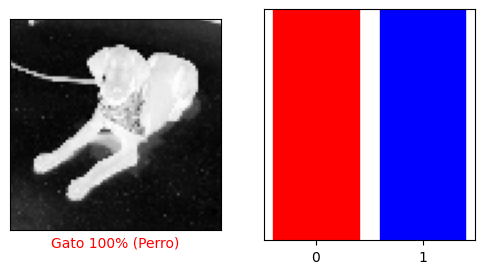

In [44]:
# Resultado de la imagen 5508
i = 5508
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_prueba, X_prueba)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_prueba)
plt.show()

In [45]:
# Resultado de la imagen 8
predictions[8]

array([0.94946283], dtype=float32)

In [46]:
# Resultado de la imagen 8
y_prueba[8]

1

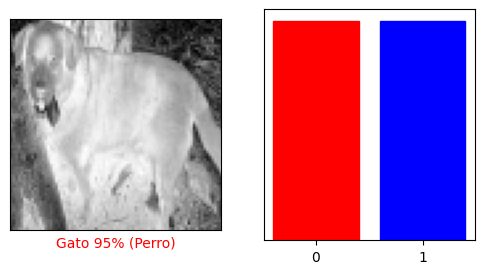

In [47]:
# Resultado de la imagen 8
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_prueba, X_prueba)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_prueba)
plt.show()